# Part1: 数据探索——数据可视化

《R for data science》第一部分学习，[原文](http://r4ds.had.co.nz/data-visualisation.html)

## 介绍

> “The simple graph has brought more information to the data analyst’s mind than any other device.” — John Tukey

> 最简单的图形比其他事物能给数据分析师带来更多信息 —— John Tukey


这部分我们一起来学习使用ggplot2可视化数据。R有几种不同的系统用来产生图形，但ggplot2是最优雅而多变的那一种。ggplot2实现了**图形语法**，一种描述和构建图形的逻辑系统。通过ggplo2，我们能够快速学习，多处应用。

如果你想要在开始ggplot2学习之前学习更多理论基础，推荐阅读“The Layered Grammar of Graphics”, http://vita.had.co.nz/papers/layered-grammar.pdf 。

### 预备条件

导入tidyverse：

In [1]:
library(tidyverse)

Warning message:
"package 'tidyverse' was built under R version 3.4.3"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 2.2.1     √ purrr   0.2.4
√ tibble  1.4.1     √ dplyr   0.7.4
√ tidyr   0.7.2     √ stringr 1.2.0
√ readr   1.1.1     √ forcats 0.2.0
Warning message:
"package 'tibble' was built under R version 3.4.3"Warning message:
"package 'purrr' was built under R version 3.4.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


注意上述信息提示你有哪些包，**其中tidyverse有哪些函数与基本R函数（或你之前导入包函数）的冲突**。

如果你发现没有安装tidyverse包，运行

```R
install.packages("tidyverse")
library(tidyverse)
```

## 第一步

让我们使用第一个图来回答这样一个问题：有大引擎的汽车是不是比小引擎汽车消耗燃料多？你可能心中已经有了答案，但尝试更加精确地回答这个问题。引擎的大小和燃料效率是怎样的关系？是正相关？负相关？线性相关？非线性相关？

### `mpg`数据框

你可以使用`mpg`数据框来检验你的答案。**数据框是一个以列为变量、行为观测值的表格形式数据集合**。`mpg`包含了US环境保护局收集的38种模型车观测数据。

In [7]:
ggplot2::mpg # 注意jupyter notebook显示与rstudio有些不同

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


- `displ`是汽车的引擎大小，以升为单位
- `hwy`是汽车在高速公路上的燃油效率，以英里每加仑为单位。

想获取更多关于`mpg`信息，运行`?mpg`打开帮助页面。

### 创建一个ggplot对象

想要绘制`mpg`，运行下面的代码令`displ`在x轴上，`hwy`在y轴上：

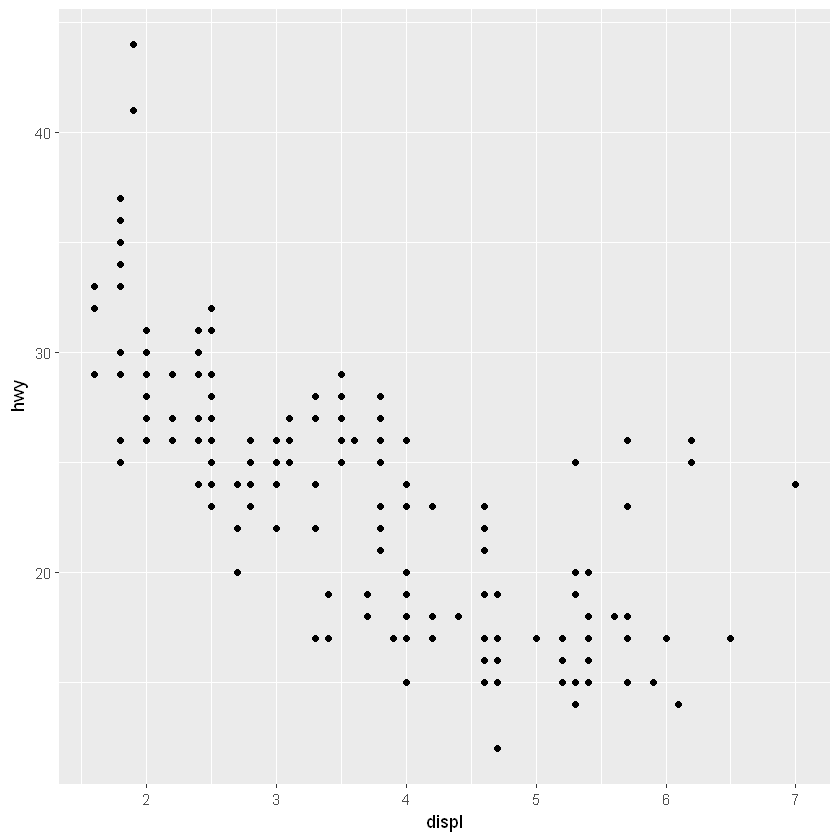

In [8]:
ggplot(data = mpg) + 
    geom_point(mapping = aes(x = displ, y = hwy))